In [75]:
import numpy as np
import pandas as pd
import seaborn as sns

In [76]:
# df = pd.read_csv('https://raw.githubusercontent.com/ulstu/ml/master/ml_course_ru/assignments/titanic_train.csv')
# df.head()

In [77]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/ulstu/ml/master/ml_course_ru/assignments/titanic_train.csv'
)
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [78]:
df.groupby('Embarked').median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,455.0,1.0,1.0,29.0,0.0,0.0,29.70
Q,389.0,0.0,3.0,27.0,0.0,0.0,7.75
S,447.5,0.0,3.0,28.0,0.0,0.0,13.00


In [79]:
df.shape

(891, 12)

In [80]:
len(df['Sex'])

891

In [81]:
len(df)
df.shape[0]
len(df.index)

891

In [82]:
df.groupby('Embarked', dropna=False).count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129
NaN,2,2,2,2,2,2,2,2,2,2,2


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## pivot melt

In [84]:
data = [
    ['one', 1., 2, 'x'],
    ['two', 4., 5, 'y'],
    ['six', 5., 3, 'z'],
    ['one', 6., 5, 'w'],
]
cols = ['foo', 'bar', 'buz', 'fee']
df2 = pd.DataFrame(data, columns=cols)
df2

,foo,bar,buz,fee
0,one,1.0,2,x
1,two,4.0,5,y
2,six,5.0,3,z
3,one,6.0,5,w


In [85]:
df2.pivot(index='foo', columns='bar', values='fee')

bar,1.0,4.0,5.0,6.0
foo,,,,
one,x,NaN,NaN,w
six,NaN,NaN,z,NaN
two,NaN,y,NaN,NaN


In [86]:
df2.stack()

0  foo    one
   bar    1.0
   buz      2
   fee      x
1  foo    two
   bar    4.0
   buz      5
   fee      y
2  foo    six
   bar    5.0
   buz      3
   fee      z
3  foo    one
   bar    6.0
   buz      5
   fee      w
dtype: object

In [87]:
df2

,foo,bar,buz,fee
0,one,1.0,2,x
1,two,4.0,5,y
2,six,5.0,3,z
3,one,6.0,5,w


In [88]:
df2.melt('foo')

,foo,variable,value
0,one,bar,1.0
1,two,bar,4.0
2,six,bar,5.0
3,one,bar,6.0
4,one,buz,2
5,two,buz,5
6,six,buz,3
7,one,buz,5
8,one,fee,x
9,two,fee,y


### unstack

In [89]:
index = pd.MultiIndex.from_tuples([('one', 'x'), ('one', 'y'), ('two', 'x'),
                                   ('two', 'y')])
s = pd.Series(np.arange(2.0, 6.0), index=index)
s

one  x    2.0
     y    3.0
two  x    4.0
     y    5.0
dtype: float64

In [90]:
s.unstack(level=-1)

,x,y
one,2.0,3.0
two,4.0,5.0


## stack transpose

In [91]:
df_single_level_cols = pd.DataFrame([[0, 2], [3, 4]],
                                    index=['deer', 'monkey'],
                                    columns=['weight', 'height'])
df_single_level_cols

,weight,height
deer,0,2
monkey,3,4


In [92]:
df_single_level_cols.stack()

deer    weight    0
        height    2
monkey  weight    3
        height    4
dtype: int64

In [93]:
df_single_level_cols.transpose()

,deer,monkey
weight,0,3
height,2,4


In [94]:
multicol1 = pd.MultiIndex.from_tuples([('weight', 'kg'), ('weight', 'pounds')])
df_multi_level_cols1 = pd.DataFrame([[3, 4], [4, 5]],
                                    columns=['deer', 'monkey'],
                                    index=multicol1)
df_multi_level_cols1

deer  monkey
weight kg         3       4
       pounds     4       5

In [95]:
df_multi_level_cols1.unstack()

deer        monkey       
         kg pounds     kg pounds
weight    3      4      4      5

In [96]:
multicol2 = pd.MultiIndex.from_tuples([('weight', 'kg'), ('height', 'm')])
df_multi_level_cols2 = pd.DataFrame([[2.0, 3.0], [4.0, 5.0]],
                                    index=['deer', 'monkey'],
                                    columns=multicol2)
df_multi_level_cols2

,weight,height
,kg,m
deer,2.0,3.0
monkey,4.0,5.0


In [97]:
df_multi_level_cols2.stack()

height  weight
deer   kg     NaN     2.0
       m      3.0     NaN
monkey kg     NaN     4.0
       m      5.0     NaN

In [98]:
df = sns.load_dataset("titanic")
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [99]:
df.groupby(['sex', 'class'])['survived'].mean().unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [100]:
df.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [101]:
age = pd.cut(df['age'], [0, 10, 80])
df.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 10]   0.000000  1.000000  0.500000
       (10, 80]  0.976190  0.909091  0.450000
male   (0, 10]   1.000000  1.000000  0.363636
       (10, 80]  0.383838  0.066667  0.129870

In [102]:
fare = pd.qcut(df['fare'], 2)
df.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 10]               NaN       NaN  0.800000           0.00000   
       (10, 80]              NaN  0.892857  0.519231           0.97619   
male   (0, 10]               NaN       NaN  1.000000           1.00000   
       (10, 80]              0.0  0.090909  0.127551           0.40000   

fare                                 
class              Second     Third  
sex    age                           
female (0, 10]   1.000000  0.411765  
       (10, 80]  0.921053  0.321429  
male   (0, 10]   1.000000  0.263158  
       (10, 80]  0.028571  0.142857

In [103]:
df.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


## groupby and agg

In [104]:
df = sns.load_dataset("titanic")
df['fare'].agg(['sum', 'mean'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [105]:
df.agg({"fare": ["sum", "mean"], "sex": ["count"]})

,fare,sex
sum,28693.949300,NaN
mean,32.204208,NaN
count,NaN,891.0


In [106]:
df.agg(fare_sum=('fare', 'sum'),
       fare_sum_mean=('fare', 'mean'),
       sex_count=('sex', 'count'))

,fare,sex
fare_sum,28693.949300,NaN
fare_sum_mean,32.204208,NaN
sex_count,NaN,891.0


In [107]:
agg_func_math = {
    'fare':
    ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod']
}
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
df.groupby(['embark_town']).agg(agg_func_math).round(2)

fare                                                     \
                  sum   mean median   min     max    std      var    mad   
embark_town                                                                
Cherbourg    10072.30  59.95  29.70  4.01  512.33  83.91  7041.39  53.02   
Queenstown    1022.25  13.28   7.75  6.75   90.00  14.19   201.30   7.87   
Southampton  17439.40  27.08  13.00  0.00  263.00  35.89  1287.95  21.30   

                            
                      prod  
embark_town                 
Cherbourg    6.193716e+250  
Queenstown    6.458671e+78  
Southampton   0.000000e+00

In [109]:
agg_func_describe = {'fare': ['sum']}
print(df.groupby('embark_town').agg(agg_func_describe).round(2))
df.groupby('embark_town')['fare'].sum()

                 fare
                  sum
embark_town          
Cherbourg    10072.30
Queenstown    1022.25
Southampton  17439.40


embark_town
Cherbourg      10072.2962
Queenstown      1022.2543
Southampton    17439.3988
Name: fare, dtype: float64

In [110]:
agg_func_count = {'embark_town': ['count', 'nunique', 'size']}
df.groupby(['deck']).agg(agg_func_count)  # статистика по палубам Титаника
df.groupby('sex')['fare'].mean()

sex
female    44.479818
male      25.523893
Name: fare, dtype: float64

In [111]:
agg_func = {'fare': ['first', 'last']}
df.sort_values(by=['fare'],
               ascending=False).groupby(['embark_town']).agg(agg_func)

fare        
                first    last
embark_town                  
Cherbourg    512.3292  4.0125
Queenstown    90.0000  6.7500
Southampton  263.0000  0.0000

In [112]:
agg_func_max_min = {'fare': ['idxmax', 'idxmin']}
df.groupby(['embark_town']).agg(agg_func_max_min)

fare       
            idxmax idxmin
embark_town              
Cherbourg      258    378
Queenstown     245    143
Southampton     27    179

In [113]:
df.loc[[258, 378]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
378,0,3,male,20.0,0,0,4.0125,C,Third,man,True,NaN,Cherbourg,no,True


In [114]:
df.loc[df.groupby('class')['fare'].idxmax()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
258,1,1,female,35.0,0,0,512.3292,C,First,woman,False,NaN,Cherbourg,yes,True
72,0,2,male,21.0,0,0,73.5000,S,Second,man,True,NaN,Southampton,no,True
159,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False


In [115]:
df.groupby('class')['fare'].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [116]:
from scipy.stats import skew, mode

agg_func_stats = {'fare': [skew, mode, pd.Series.mode]}
df.groupby('embark_town').agg(agg_func_stats)

fare                          
                 skew              mode    mode
embark_town                                    
Cherbourg    3.305112  ([7.2292], [15])  7.2292
Queenstown   4.265111    ([7.75], [30])  7.7500
Southampton  3.640276    ([8.05], [43])  8.0500

In [117]:
agg_func_text = {'deck': ['nunique', mode, 'count', len, 'size', set]}
df.groupby('class').agg(agg_func_text)

deck                                                   
       nunique         mode count  len size                   set
class                                                            
First        5  ([C], [59])   175  216  216  {nan, C, B, A, D, E}
Second       3   ([F], [8])    16  184  184        {nan, E, F, D}
Third        3   ([F], [5])    12  491  491        {nan, E, F, G}

In [118]:
from functools import partial

q_25 = partial(pd.Series.quantile, q=.25)
q_25.__name__ = '25%'


def percentile_25(x):
    return x.quantile(.25)


lambda_25 = lambda x: x.quantile(.25)
lambda_25.__name__ = 'lambds_25%'
agg_func = {
    'fare': [q_25, percentile_25, lambda_25, lambda x: x.quantile(.25)]
}
df.groupby(['embark_town']).agg(agg_func).round(2)

fare                                    
               25% percentile_25 lambds_25% <lambda_0>
embark_town                                           
Cherbourg    13.70         13.70      13.70      13.70
Queenstown    7.75          7.75       7.75       7.75
Southampton   8.05          8.05       8.05       8.05

In [119]:
def count_nulls(s):
    return s.size - s.count()


def unique_nan(s):
    return s.nunique(dropna=False)

In [120]:
agg_func_custom_count = {
    'embark_town': ['count', 'nunique', 'size', unique_nan, count_nulls, set]
}
df.groupby(['deck']).agg(agg_func_custom_count)

embark_town                                      \
           count nunique size unique_nan count_nulls   
deck                                                   
A             15       2   15          2           0   
B             45       2   47          3           2   
C             59       3   59          3           0   
D             33       2   33          2           0   
E             32       3   32          3           0   
F             13       3   13          3           0   
G              4       1    4          1           0   

                                            
                                       set  
deck                                        
A                 {Southampton, Cherbourg}  
B            {nan, Cherbourg, Southampton}  
C     {Southampton, Queenstown, Cherbourg}  
D                 {Southampton, Cherbourg}  
E     {Southampton, Queenstown, Cherbourg}  
F     {Southampton, Queenstown, Cherbourg}  
G                            {Southampton}

In [121]:
def percentile_90(x):
    return x.quantile(0.9)

In [122]:
agg_func_custom_count = {
    'fare':
    ['count', 'nunique', 'size', unique_nan, count_nulls, set, percentile_90]
}
df.groupby('deck').agg(agg_func_custom_count)

fare                                      \
     count nunique size unique_nan count_nulls   
deck                                             
A       15      14   15         14           0   
B       47      26   47         26           0   
C       59      31   59         31           0   
D       33      20   33         20           0   
E       32      20   32         20           0   
F       13       7   13          7           0   
G        4       2    4          2           0   

                                                                       
                                                    set percentile_90  
deck                                                                   
A     {0.0, 34.6542, 35.5, 39.6, 40.125, 81.8583, 50...      54.95752  
B     {0.0, 512.3292, 5.0, 262.375, 146.5208, 26.55,...     247.52080  
C     {263.0, 135.6333, 151.55, 153.4625, 26.55, 27....     222.92836  
D     {12.875, 13.0, 13.7917, 25.9292, 26.2833, 30.0...      78.26670  
E     {134.5, 8.05, 10.5, 12.35, 13.0, 12.475, 25.58...      79.65000  
F         {39.0, 7.65, 7.75, 10.5, 13.0, 22.3583, 26.0}      36.40000  
G                                       {16.7, 10.4625}      16.70000

In [123]:
df.groupby(['embark_town', 'class']).agg({
    'fare': 'sum'
}).assign(pct_total=lambda x: x / x.sum())

fare  pct_total
embark_town class                       
Cherbourg   First   8901.0750   0.311947
            Second   431.0917   0.015108
            Third    740.1295   0.025939
Queenstown  First    180.0000   0.006308
            Second    37.0500   0.001298
            Third    805.2043   0.028219
Southampton First   8936.3375   0.313183
            Second  3333.7000   0.116833
            Third   5169.3613   0.181165

In [124]:
df.groupby(['sex']).agg({
    'fare': 'mean'
}).assign(mean_in_k_dollars=lambda x: x / 1000)

,fare,mean_in_k_dollars
sex,,
female,44.479818,0.044480
male,25.523893,0.025524


In [125]:
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

## DateOffset 

In [126]:
ts = pd.Timestamp('2019-9-29 07:15:11')
print(ts)
do = pd.tseries.offsets.DateOffset(n=2)
do

2019-09-29 07:15:11


<2 * DateOffsets>

In [127]:
ts + do

Timestamp('2019-10-01 07:15:11')

## Grouper and agg

In [128]:
df = pd.read_excel(
    "https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=True"
)
df

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
1495,737550,"Fritsch, Russel and Anderson",S1-06532,12,55.80,669.60,2014-12-30 13:38:13
1496,786968,"Frami, Hills and Schmidt",S1-06532,37,13.14,486.18,2014-12-30 21:42:17
1497,239344,Stokes LLC,S2-10342,14,38.75,542.50,2014-12-30 22:45:19
1498,642753,Pollich LLC,S2-82423,3,65.97,197.91,2014-12-31 10:36:24


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   account number  1500 non-null   int64  
 1   name            1500 non-null   object 
 2   sku             1500 non-null   object 
 3   quantity        1500 non-null   int64  
 4   unit price      1500 non-null   float64
 5   ext price       1500 non-null   float64
 6   date            1500 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 82.2+ KB


In [130]:
df['date'] = pd.to_datetime(df['date'])

In [131]:
df.dtypes

account number             int64
name                      object
sku                       object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [132]:
df.set_index('date').resample('M')['ext price'].sum()

date
2014-01-31    185361.66
2014-02-28    146211.62
2014-03-31    203921.38
2014-04-30    174574.11
2014-05-31    165418.55
2014-06-30    174089.33
2014-07-31    191662.11
2014-08-31    153778.59
2014-09-30    168443.17
2014-10-31    171495.32
2014-11-30    119961.22
2014-12-31    163867.26
Freq: M, Name: ext price, dtype: float64

In [133]:
df.set_index('date').groupby('name')['ext price'].resample('M').sum()

name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64

In [134]:
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum()

name        date      
Barton LLC  2014-01-31     6177.57
            2014-02-28    12218.03
            2014-03-31     3513.53
            2014-04-30    11474.20
            2014-05-31    10220.17
                            ...   
Will LLC    2014-08-31     1439.82
            2014-09-30     4345.99
            2014-10-31     7085.33
            2014-11-30     3210.44
            2014-12-31    12561.21
Name: ext price, Length: 240, dtype: float64

In [135]:
df.groupby(['name', pd.Grouper(key='date', freq='A-DEC')])['ext price'].sum()

name                             date      
Barton LLC                       2014-12-31    109438.50
Cronin, Oberbrunner and Spencer  2014-12-31     89734.55
Frami, Hills and Schmidt         2014-12-31    103569.59
Fritsch, Russel and Anderson     2014-12-31    112214.71
Halvorson, Crona and Champlin    2014-12-31     70004.36
Herman LLC                       2014-12-31     82865.00
Jerde-Hilpert                    2014-12-31    112591.43
Kassulke, Ondricka and Metz      2014-12-31     86451.07
Keeling LLC                      2014-12-31    100934.30
Kiehn-Spinka                     2014-12-31     99608.77
Koepp Ltd                        2014-12-31    103660.54
Kuhn-Gusikowski                  2014-12-31     91094.28
Kulas Inc                        2014-12-31    137351.96
Pollich LLC                      2014-12-31     87347.18
Purdy-Kunde                      2014-12-31     77898.21
Sanford and Sons                 2014-12-31     98822.98
Stokes LLC                       2014-12-31 

## agg

In [136]:
df[['ext price', 'quantity']].sum()

ext price    2018784.32
quantity       36463.00
dtype: float64

In [137]:
df['unit price'].mean()

55.007526666666664

In [138]:
df[['ext price', 'quantity', 'unit price']].agg(['sum', 'mean'])

,ext price,quantity,unit price
sum,2.018784e+06,36463.000000,82511.290000
mean,1.345856e+03,24.308667,55.007527


In [139]:
df.agg({
    'ext price': ['sum', 'mean'],
    'quantity': ['sum', 'mean'],
    'unit price': ['mean']
})

,ext price,quantity,unit price
sum,2.018784e+06,36463.000000,NaN
mean,1.345856e+03,24.308667,55.007527


In [140]:
get_max = lambda x: x.value_counts(dropna=False).index[0]
df.agg({
    'ext price': ['sum', 'mean'],
    'quantity': ['sum', 'mean'],
    'unit price': ['mean'],
    'sku': [get_max]
})

,ext price,quantity,unit price,sku
sum,2.018784e+06,36463.000000,NaN,NaN
mean,1.345856e+03,24.308667,55.007527,NaN
<lambda>,NaN,NaN,NaN,S2-77896


In [141]:
get_max.__name__ = 'most frequent'

In [142]:
df.agg({
    'ext price': ['sum', 'mean'],
    'quantity': ['sum', 'mean'],
    'unit price': ['mean'],
    'sku': [get_max]
})

,ext price,quantity,unit price,sku
sum,2.018784e+06,36463.000000,NaN,NaN
mean,1.345856e+03,24.308667,55.007527,NaN
most frequent,NaN,NaN,NaN,S2-77896


## some pratice

In [143]:
df = pd.DataFrame(
    {
        'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
        'population': [17.04, 143.5, 9.5, 45.5],
        'square': [2724902, 17125191, 207600, 603628]
    },
    index=['KZ', 'RU', 'BY', 'UA'])
df

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [144]:
df.loc['KZ']

country       Kazakhstan
population         17.04
square           2724902
Name: KZ, dtype: object

In [145]:
df['country']

KZ    Kazakhstan
RU        Russia
BY       Belarus
UA       Ukraine
Name: country, dtype: object

In [146]:
df[df.population > 10][['country']]

,country
KZ,Kazakhstan
RU,Russia
UA,Ukraine


In [147]:
df['density'] = df['population'] / df['square'] * 1000000
df['density']

KZ     6.253436
RU     8.379469
BY    45.761079
UA    75.377550
Name: density, dtype: float64

In [148]:
df.drop(['density'], axis='columns')

,country,population,square
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


In [149]:
df.rename(columns={'Country Code': 'country_code'})

,country,population,square,density
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


In [171]:
df[df['square'] > 1000000].size

8

In [172]:
df.size

16

## crosstable

In [158]:
headers = [
    "symboling", "normalized_losses", "make", "fuel_type", "aspiration",
    "num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base",
    "length", "width", "height", "curb_weight", "engine_type", "num_cylinders",
    "engine_size", "fuel_system", "bore", "stroke", "compression_ratio",
    "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"
]
df_raw = pd.read_csv(
    "https://github.com/dm-fedorov/pandas_basic/blob/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/imports-85.data?raw=true",
    header=None,
    names=headers,
    na_values="?")
df_raw.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [159]:
df_raw.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [167]:
models = [
    "toyota", "nissan", "mazda", "honda", "mitsubishi", "subaru", "volkswagen",
    "volvo"
]
df = df_raw[df_raw.make.isin(models)].copy()
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58.0,4800.0,49,54,6479.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
32,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60.0,5500.0,38,42,5399.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [163]:
pd.crosstab(df.make, df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [173]:
pd.pivot_table(df,
               index=df.make,
               columns=df.body_style,
               aggfunc={'body_style': len},
               fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

In [178]:
df.groupby(['make', 'body_style'])['body_style'].count().unstack().fillna(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.0,7.0,5.0,1.0
mazda,0.0,0.0,10.0,7.0,0.0
mitsubishi,0.0,0.0,9.0,4.0,0.0
nissan,0.0,1.0,5.0,9.0,3.0
subaru,0.0,0.0,3.0,5.0,4.0
toyota,1.0,3.0,14.0,10.0,4.0
volkswagen,1.0,0.0,1.0,9.0,1.0
volvo,0.0,0.0,0.0,8.0,3.0


In [179]:
pd.crosstab(df['make'], df['num_doors'], margins=True, margins_name='Total')

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


In [181]:
pd.crosstab(df.make, df.body_style, values=df.curb_weight,
            aggfunc='mean').round(0)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,NaN,NaN,1970.0,2289.0,2024.0
mazda,NaN,NaN,2254.0,2361.0,NaN
mitsubishi,NaN,NaN,2377.0,2394.0,NaN
nissan,NaN,2008.0,2740.0,2238.0,2452.0
subaru,NaN,NaN,2137.0,2314.0,2454.0
toyota,2975.0,2585.0,2370.0,2338.0,2708.0
volkswagen,2254.0,NaN,2221.0,2342.0,2563.0
volvo,NaN,NaN,NaN,3023.0,3078.0


In [183]:
pd.crosstab(df.make, df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


In [184]:
pd.crosstab(df.make, df.body_style, normalize='columns')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


In [185]:
pd.crosstab(df.make, df.body_style, normalize='index')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


### cross table grouping

In [189]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

In [190]:
pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels],
            rownames=['Auto Manufacturer', "Doors"],
            colnames=['Body Style', "Drive Type"],
            dropna=False)

Body Style              convertible         hardtop         hatchback          \
Drive Type                      4wd fwd rwd     4wd fwd rwd       4wd fwd rwd   
Auto Manufacturer Doors                                                         
honda             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   7   0   
mazda             four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   0   0         0   5   4   
mitsubishi        four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   9   0   
nissan            four            0   0   0       0   0   0         0   1   0   
                  two             0   0   0       0   1   0         0   1   3   
subaru            four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         1   2   0   
toyota            four            0   0   0       0   0   0         0   6   0   
                  two             0   0   1       0   0   3         0   2   6   
volkswagen        four            0   0   0       0   0   0         0   0   0   
                  two             0   1   0       0   0   0         0   1   0   
volvo             four            0   0   0       0   0   0         0   0   0   
                  two             0   0   0       0   0   0         0   0   0   

Body Style              sedan         wagon          
Drive Type                4wd fwd rwd   4wd fwd rwd  
Auto Manufacturer Doors                              
honda             four      0   4   0     0   1   0  
                  two       0   1   0     0   0   0  
mazda             four      0   4   2     0   0   0  
                  two       0   0   0     0   0   0  
mitsubishi        four      0   4   0     0   0   0  
                  two       0   0   0     0   0   0  
nissan            four      0   5   0     0   3   0  
                  two       0   4   0     0   0   0  
subaru            four      2   3   0     2   2   0  
                  two       0   0   0     0   0   0  
toyota            four      0   7   1     2   1   1  
                  two       0   0   2     0   0   0  
volkswagen        four      0   7   0     0   1   0  
                  two       0   2   0     0   0   0  
volvo             four      0   0   8     0   0   3  
                  two       0   0   0     0   0   0

In [192]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels],
            values=df.curb_weight,
            aggfunc='mean').fillna('-')

body_style   convertible         hardtop         hatchback               \
drive_wheels         fwd     rwd     fwd     rwd       4wd          fwd   
make                                                                      
honda                  -       -       -       -         -       1970.0   
mazda                  -       -       -       -         -  2148.333333   
mitsubishi             -       -       -       -         -  2376.555556   
nissan                 -       -  2008.0       -         -       2176.0   
subaru                 -       -       -       -    2240.0       2085.0   
toyota                 -  2975.0       -  2585.0         -      2177.25   
volkswagen        2254.0       -       -       -         -       2221.0   
volvo                  -       -       -       -         -            -   

body_style                  sedan                             wagon  \
drive_wheels          rwd     4wd          fwd          rwd     4wd   
make                                                                  
honda                   -       -       2288.8            -       -   
mazda             2411.25       -       2231.6       2685.0       -   
mitsubishi              -       -       2394.0            -       -   
nissan        3116.333333       -  2237.888889            -       -   
subaru                  -  2447.5       2225.0            -  2535.0   
toyota        2626.833333       -  2258.571429  2521.666667  2700.0   
volkswagen              -       -  2342.222222            -       -   
volvo                   -       -            -       3023.0       -   

body_style                              
drive_wheels          fwd          rwd  
make                                    
honda              2024.0            -  
mazda                   -            -  
mitsubishi              -            -  
nissan        2452.333333            -  
subaru             2372.5            -  
toyota             2280.0       3151.0  
volkswagen         2563.0            -  
volvo                   -  3077.666667

In [195]:
pd.crosstab(df.make, [df.body_style, df.drive_wheels],
            values=df.curb_weight,
            aggfunc='mean',
            margins=True, 
            margins_name="Average").fillna('-').round(0)

body_style   convertible         hardtop         hatchback               \
drive_wheels         fwd     rwd     fwd     rwd       4wd          fwd   
make                                                                      
honda                  -       -       -       -         -       1970.0   
mazda                  -       -       -       -         -  2148.333333   
mitsubishi             -       -       -       -         -  2376.555556   
nissan                 -       -  2008.0       -         -       2176.0   
subaru                 -       -       -       -    2240.0       2085.0   
toyota                 -  2975.0       -  2585.0         -      2177.25   
volkswagen        2254.0       -       -       -         -       2221.0   
volvo                  -       -       -       -         -            -   
Average           2254.0  2975.0  2008.0  2585.0    2240.0       2178.0   

body_style                  sedan                             wagon  \
drive_wheels          rwd     4wd          fwd          rwd     4wd   
make                                                                  
honda                   -       -       2288.8            -       -   
mazda             2411.25       -       2231.6       2685.0       -   
mitsubishi              -       -       2394.0            -       -   
nissan        3116.333333       -  2237.888889            -       -   
subaru                  -  2447.5       2225.0            -  2535.0   
toyota        2626.833333       -  2258.571429  2521.666667  2700.0   
volkswagen              -       -  2342.222222            -       -   
volvo                   -       -            -       3023.0       -   
Average       2673.461538  2447.5  2282.952381  2855.307692  2617.5   

body_style                             Average  
drive_wheels          fwd          rwd          
make                                            
honda              2024.0            -  2097.0  
mazda                   -            -  2298.0  
mitsubishi              -            -  2382.0  
nissan        2452.333333            -  2400.0  
subaru             2372.5            -  2316.0  
toyota             2280.0       3151.0  2441.0  
volkswagen         2563.0            -  2343.0  
volvo                   -  3077.666667  3038.0  
Average          2371.125       3096.0  2406.0

<AxesSubplot:xlabel='body_style-drive_wheels', ylabel='make-num_doors'>

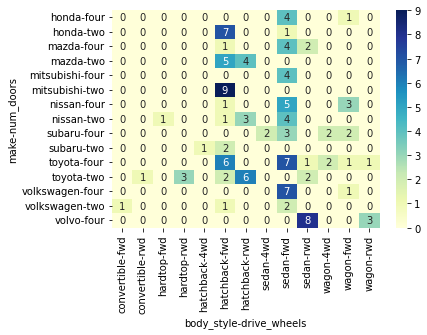

In [196]:
sns.heatmap(pd.crosstab([df.make, df.num_doors],
                        [df.body_style, df.drive_wheels]),
            cmap='YlGnBu',
            annot=True,
            cbar=True)